In [199]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from pandas import read_excel
from scipy.optimize import curve_fit



In [200]:
df = read_excel('BookNovo.xlsx', sheet_name='Multicor', header= None, names=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
#df1 = df.replace({',': '.'}, regex=True)

Plot de todas as cores juntas

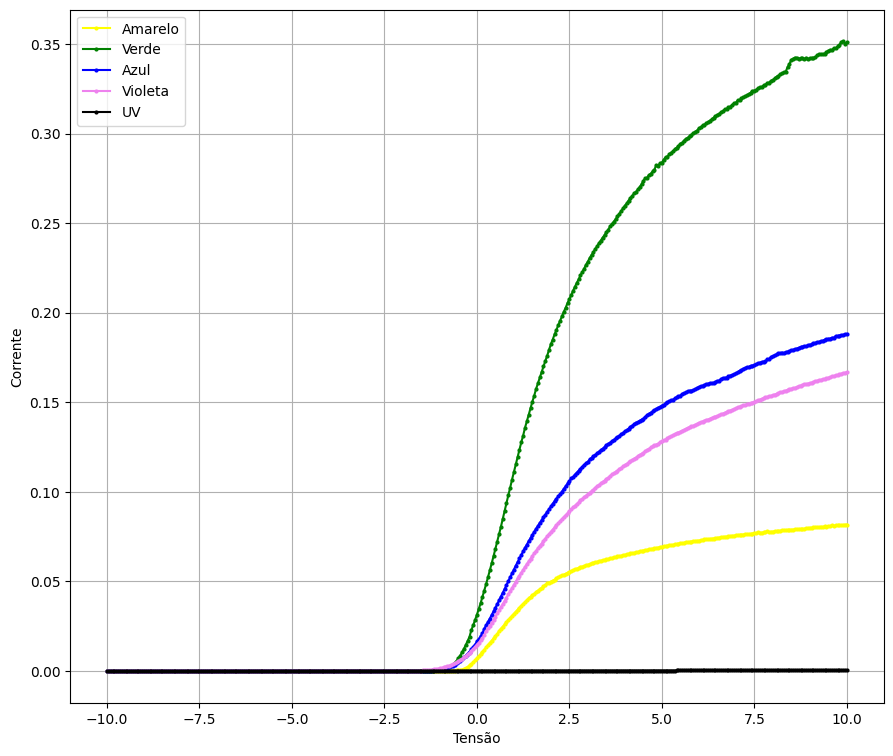

In [201]:
plt.figure(figsize=(10.5 , 9))
plt.plot(df['A'], df['B'], marker = '.', label ='Amarelo', color ='yellow', markersize = 4)
plt.plot(df['A'], df['D'], marker = '.', label = 'Verde',color ='green', markersize = 4)
plt.plot(df['A'], df['F'], marker = '.', label= 'Azul', color ='blue', markersize = 4)
plt.plot(df['A'], df['H'], marker = '.', label ='Violeta', color ='violet', markersize = 4)
plt.plot(df['A'], df['J'], marker = '.', label = 'UV', color ='black', markersize = 4)

plt.ylabel('Corrente')
plt.xlabel('Tensão')
plt.grid()
plt.legend()
plt.show()

Erros serão tratados em um dataframe separado

In [202]:
def plotWithErro(sname, cor):
    dfm = read_excel('BookNovo.xlsx', sheet_name=sname, header=None, names=['A', 'B'])
    dfErr = read_excel('BookNovo.xlsx', sheet_name='Residual', header=None, names=['A', 'B'])

    
    yer = dfErr['B'].abs()*10 # Usar o valor absoluto para as barras de erro * 10 para melhorar o plot 

    y = dfm['B'].values
    x = dfm['A'].values

    plt.figure(figsize=(10.5, 9))
    plt.errorbar(x, y,yerr=yer , fmt = 'o', markerfacecolor = cor, markeredgecolor = 'black', ecolor='gray', capsize= 5, label = cor, alpha = 0.5, markersize = 4)
    plt.title('Gráfico plotado com barras de erro')
    plt.xlabel('Tensão')
    plt.ylabel('Corrente')
    plt.legend()
    plt.grid()
    plt.show()


Função que calcula os erros referentes aos VO

In [203]:
def ErroGenerator(sname, cor):
    dfm = read_excel('BookNovo.xlsx', sheet_name= sname , header = None, names = [ 'A', 'B'])
    dfErr = read_excel('BookNovo.xlsx', sheet_name='ARes', header=None, names=['A', 'B'])

    def fun( x, a, b) :
        return a*x + b

    x1 = dfm['A'].values
    y1 = dfm['B'].values
    ysigma = dfErr['B'].values

    ysup = y1 + ysigma


    poptm, pcovm = curve_fit(fun, x1, y1) #Ajuste ideal, sem erro 
    

    popte, pcove = curve_fit(fun, x1, ysup) #Ajuste somando o erro da barra superior
    print('Para +erro superior os parametros são',popte , 'E a covariancia é ', pcove)
    print('Para o valor em sí os parametros são',poptm , 'E a covariancia é ', pcovm)

    print('V_0 = ', -poptm[1]/poptm[0], cor) #Printa o V0 para a cor
    print('V_0 + ERR= ', -popte[1]/popte[0], cor) #Printa o V0 + erro para a cor

    V0Sigma = (-poptm[1]/poptm[0]) - (-popte[1]/popte[0])

    print('O Erro é : ', V0Sigma)

    # A função retorna o erro 

    return V0Sigma

Função plot de cor única

In [204]:
def plotGenerator(sname, cor):
    dfm = read_excel('BookNovo.xlsx', sheet_name= sname, header = None, names = [ 'A', 'B'])
    plt.figure(figsize=(10.5 , 9))
    plt.plot(dfm['A'], dfm['B'], marker = '.', label = cor, color = cor, markersize = '4')
    plt.xlabel('Tensão')
    plt.ylabel('Correte')
    plt.legend()
    plt.grid()
    plt.show()

Função Plot do Ajuste e Tirada de V0 

In [205]:
def v0Generator(sname, cor ):
    dfm = read_excel('BookNovo.xlsx', sheet_name= sname , header = None, names = [ 'A', 'B'])


    def fun( x, a, b) :
        return a*x + b

    x1 = dfm['A']
    y1 = dfm['B']



    poptm, pcovm = curve_fit(fun, x1, y1)
    

    plt.figure(figsize=(10.5 , 9))
    plt.plot(dfm['A'], dfm['B'], marker = '.', label = cor, color = cor, markersize = '4')
    plt.plot(dfm['A'], fun(x1, *poptm), marker = '.', label = 'Ajuste', color = 'orange', markersize = '4')
    plt.title('Ajuste Superior')
    plt.xlabel('Tensão')
    plt.ylabel('Correte')
    plt.legend()
    plt.grid()
    plt.show()

     

    return -poptm[1]/poptm[0]

Isso aplicado a todas as cores na planilha BookNovo.xlsx 

Falta considerar as incertezas

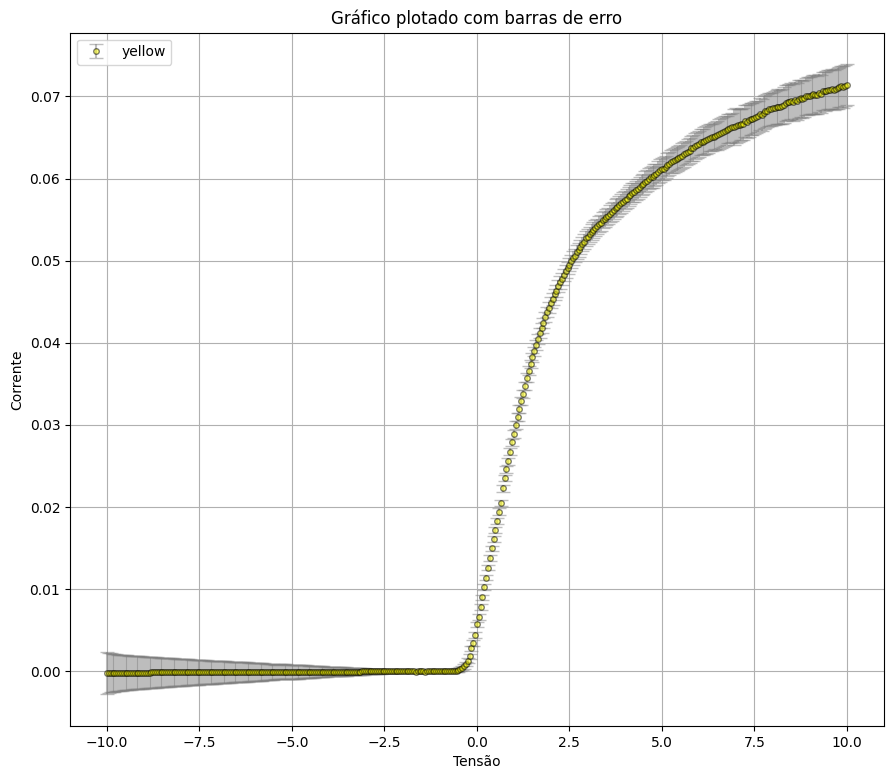

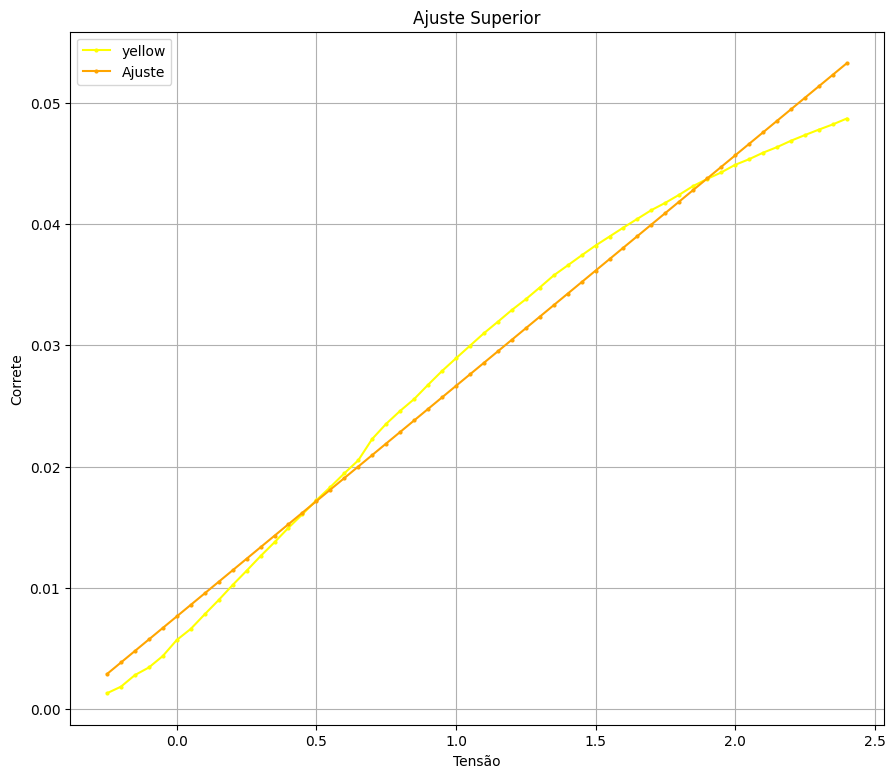

Para +erro superior os parametros são [0.01902819 0.00766898] E a covariancia é  [[ 1.20139497e-07 -1.29149959e-07]
 [-1.29149959e-07  2.11795925e-07]]
Para o valor em sí os parametros são [0.0190102  0.00763874] E a covariancia é  [[ 1.20383097e-07 -1.29411829e-07]
 [-1.29411829e-07  2.12225370e-07]]
V_0 =  -0.401823482026456 yellow
V_0 + ERR=  -0.4030325981185027 yellow
O Erro é :  0.0012091160920467137


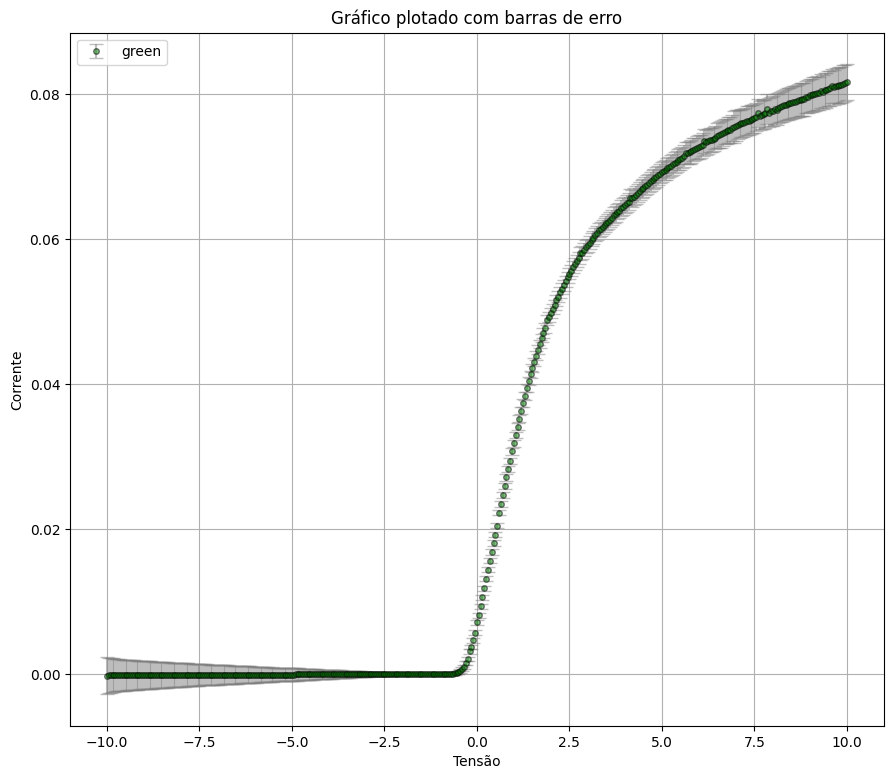

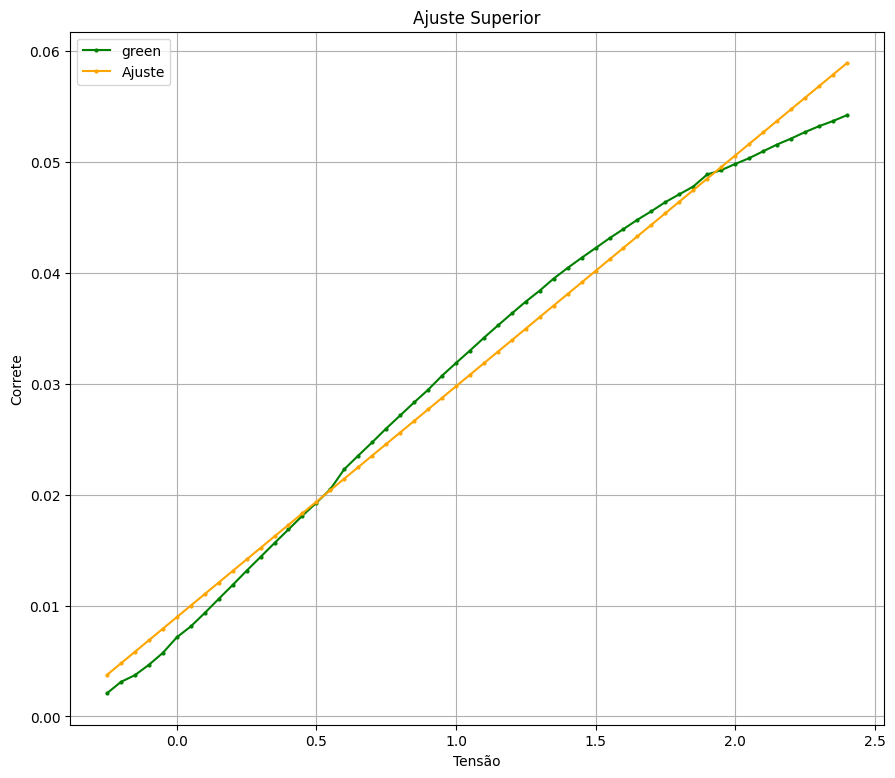

Para +erro superior os parametros são [0.02083079 0.00898136] E a covariancia é  [[ 1.18093488e-07 -1.26950501e-07]
 [-1.26950501e-07  2.08188983e-07]]
Para o valor em sí os parametros são [0.0208128  0.00895112] E a covariancia é  [[ 1.18331323e-07 -1.27206171e-07]
 [-1.27206171e-07  2.08608255e-07]]
V_0 =  -0.43007790908752486 green
V_0 + ERR=  -0.4311579887471427 green
O Erro é :  0.0010800796596178164


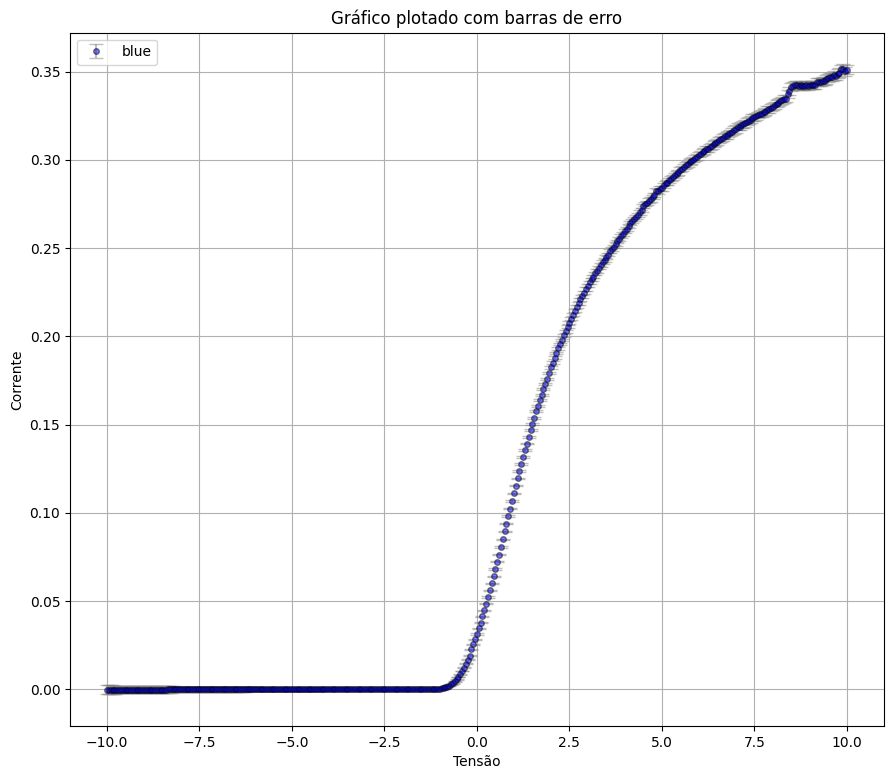

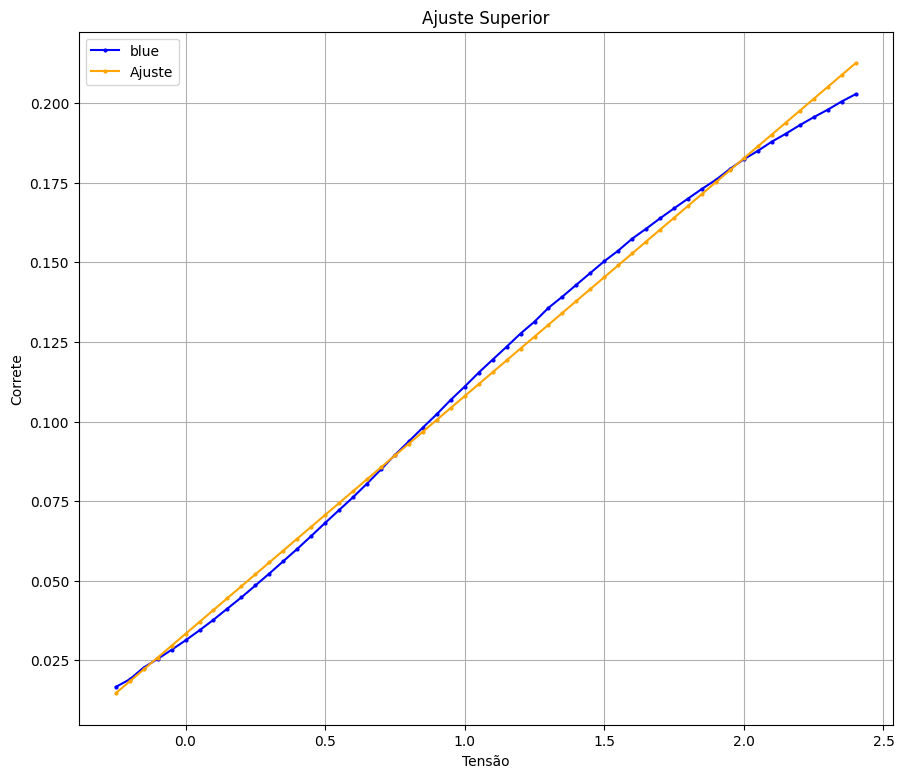

Para +erro superior os parametros são [0.07469555 0.03335693] E a covariancia é  [[ 4.34446978e-07 -4.67030506e-07]
 [-4.67030506e-07  7.65893831e-07]]
Para o valor em sí os parametros são [0.07467756 0.03332669] E a covariancia é  [[ 4.34700450e-07 -4.67302983e-07]
 [-4.67302983e-07  7.66340663e-07]]
V_0 =  -0.44627449018855503 blue
V_0 + ERR=  -0.4465717970206235 blue
O Erro é :  0.00029730683206846686


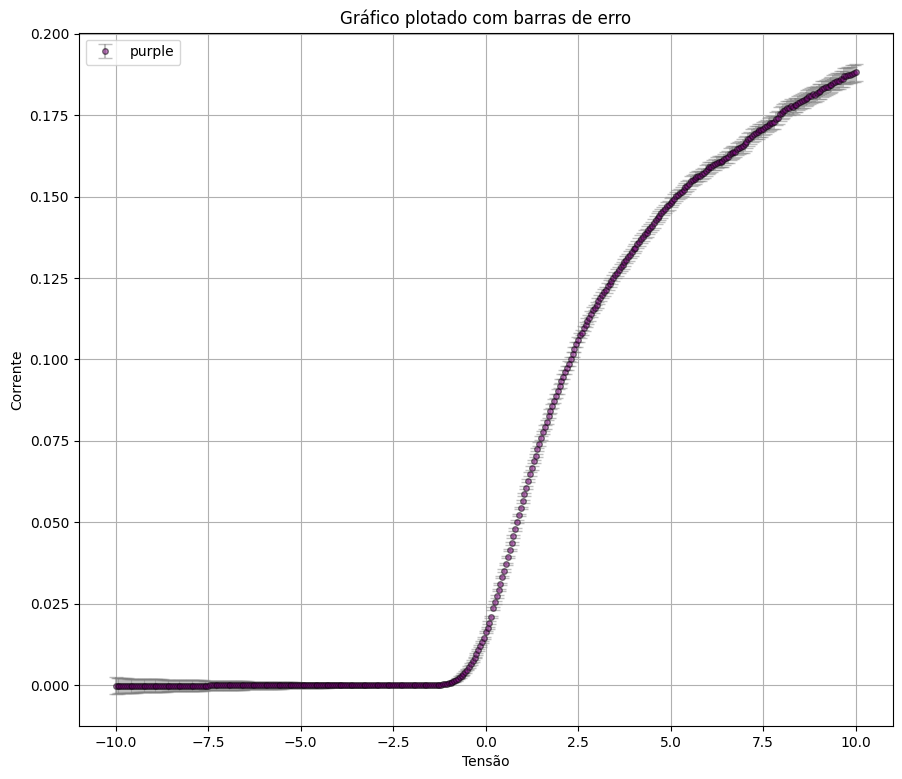

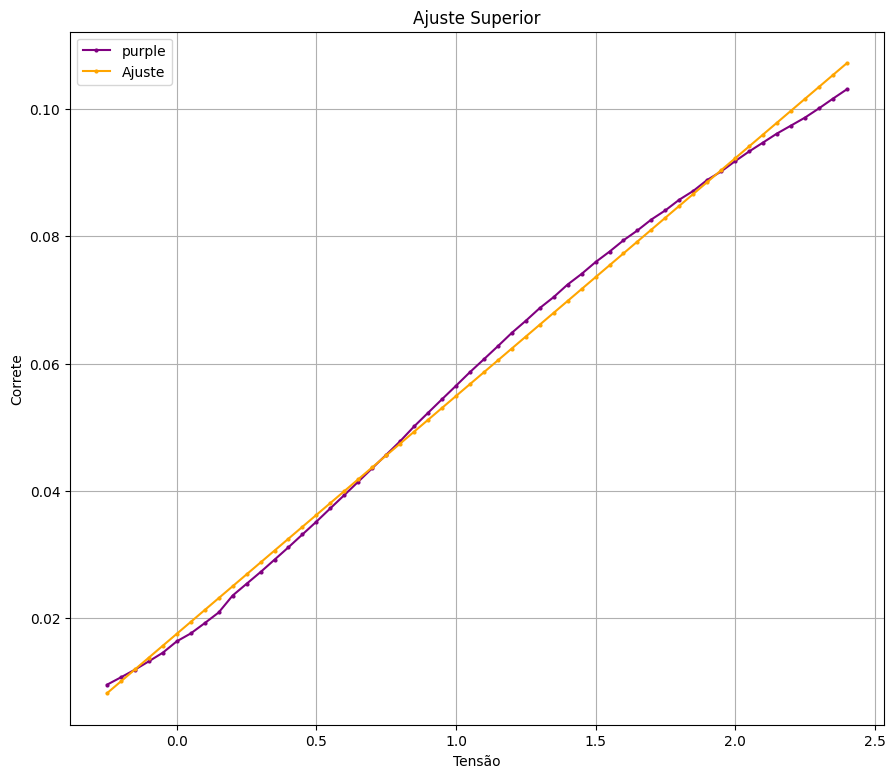

Para +erro superior os parametros são [0.03737236 0.0175696 ] E a covariancia é  [[ 1.01219082e-07 -1.08810513e-07]
 [-1.08810513e-07  1.78440806e-07]]
Para o valor em sí os parametros são [0.03735437 0.01753936] E a covariancia é  [[ 1.01358553e-07 -1.08960445e-07]
 [-1.08960445e-07  1.78686685e-07]]
V_0 =  -0.4695396745140632 purple
V_0 + ERR=  -0.47012269612310115 purple
O Erro é :  0.0005830216090379481


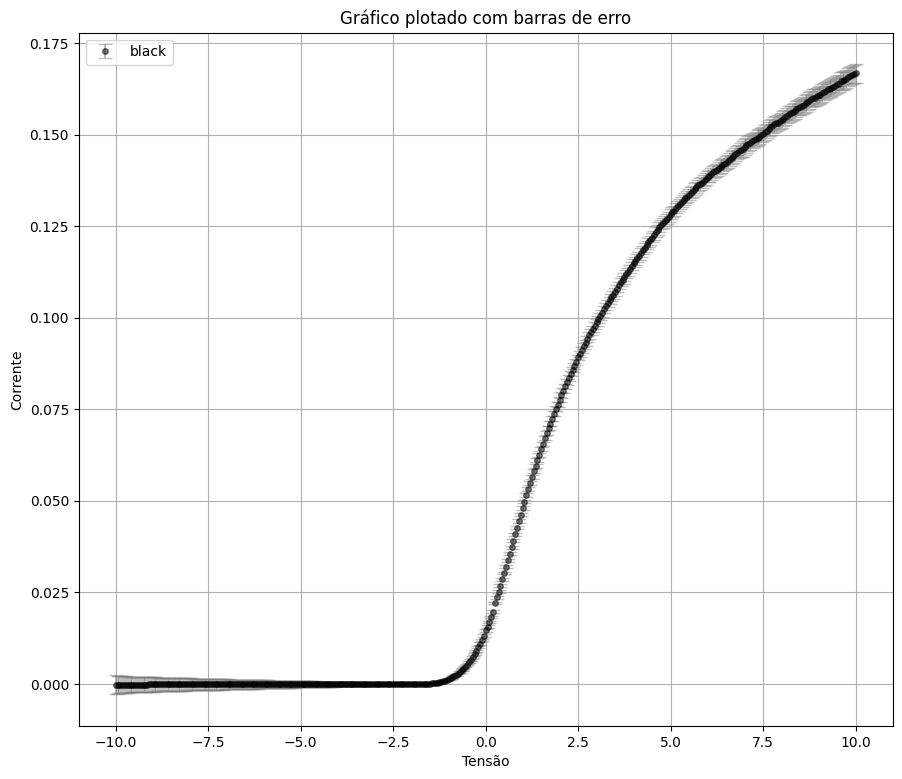

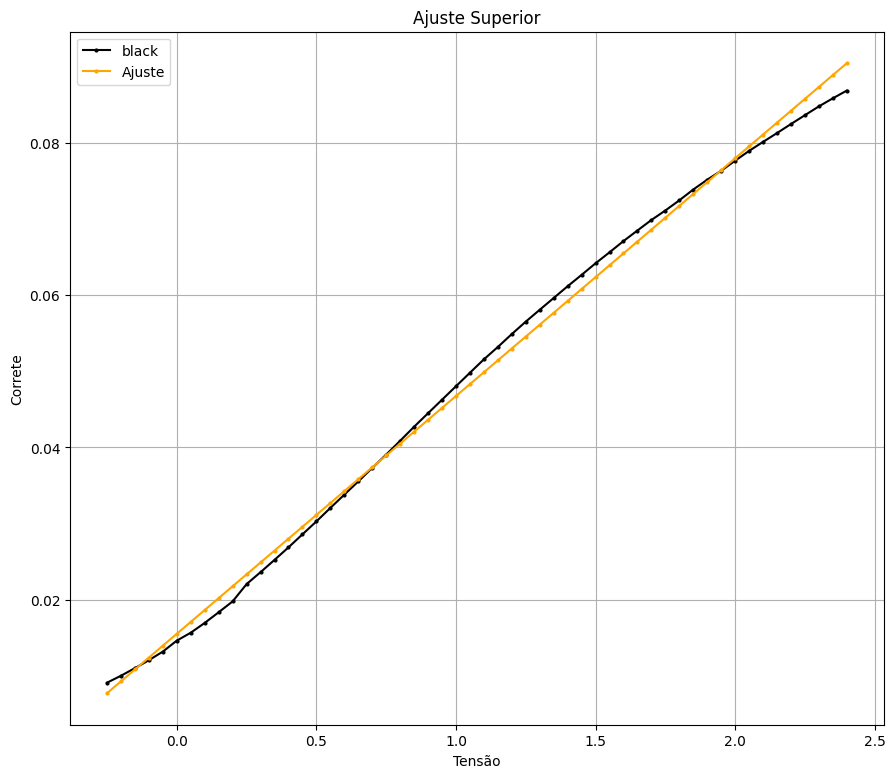

Para +erro superior os parametros são [0.03121038 0.0155736 ] E a covariancia é  [[ 6.62777692e-08 -7.12486019e-08]
 [-7.12486019e-08  1.16842183e-07]]
Para o valor em sí os parametros são [0.03119238 0.01554336] E a covariancia é  [[ 6.63818892e-08 -7.13605310e-08]
 [-7.13605310e-08  1.17025738e-07]]
V_0 =  -0.49830621793725827 black
V_0 + ERR=  -0.49898776313295534 black
O Erro é :  0.0006815451956970753
V0s =  [-0.401823482026456, -0.43007790908752486, -0.44627449018855503, -0.4695396745140632, -0.49830621793725827]
Erros =  [0.0012091160920467137, 0.0010800796596178164, 0.00029730683206846686, 0.0005830216090379481, 0.0006815451956970753]


In [206]:
dataTotC = ['Amarelo', 'Verde', 'Azul', 'Roxo', 'UV']
cores = ['yellow', 'green', 'blue', 'purple', 'black']
dataAjs = ['AAS', 'AV', 'AA', 'AR', 'AU']

V0s = []
Sigmas = [] #Lista com os erros

for i in range(0, len(dataTotC)):
    #plotGenerator(dataTotC[i], cores[i] )
    plotWithErro(dataTotC[i], cores[i])
    #v0Generator(dataAjs[i], cores[i])
    V0s.append(v0Generator(dataAjs[i], cores[i]))
    Sigmas.append(ErroGenerator(dataAjs[i], cores[i]))
    
print('V0s = ', V0s)
print('Erros = ', Sigmas)

Aqui vale notar que os dados bons para esse ajuste linear estão na faixa de [ -0.25 V , 2.4V ]

Listando as frequências a serem usadas abaixo e logo em seguida fazendo o ajuste

In [207]:
lambdaNM = ['578.2', '546.1', '435.8', '404.7', '365.4', '253.4', '184.45'] #Comprimento de onda do espectro de uma lampada de mercúrio Amarelo, Verde, Azul,Violeta, UVA, UVB, UVC
c = 299792458 # Metro / s
q = -1.602176634e-19 # Culomb
freq = []
for i in range(0, len(lambdaNM)):
    f = (c/float(lambdaNM[i])) * 10**8
    freq.append(f)
print('freq = ', freq)

del(freq[6])
del(freq[5])
print('freq = ', freq)

freq =  [51849266343825.66, 54896989196117.92, 68791293712712.26, 74077701507289.34, 82045007662835.25, 118307994475138.12, 162533184060721.06]
freq =  [51849266343825.66, 54896989196117.92, 68791293712712.26, 74077701507289.34, 82045007662835.25]


In [210]:
def hGenerator() :
    

    def ajs(x, a, b):
        return (a*x) + b 
    
    poptf, pcovf = curve_fit(ajs, freq, V0s, sigma=Sigmas, absolute_sigma=True)
    print("Parâmetros ajustados:", poptf)
    print("Matriz de covariância:", pcovf)
    
    Inctz = np.sqrt(np.diag(pcovf))
    print("Incertezas dos parâmetros ajustados:", Inctz)

    xf = np.array(freq)

    plt.figure(figsize=(10.5, 9))
   
    plt.errorbar(xf, V0s, yerr=Sigmas, fmt = 'o', markerfacecolor = 'orange', markeredgecolor = 'black', ecolor='gray', capsize= 5, label = 'Pontos Medidos')
    plt.plot(xf, ajs(xf, *poptf), marker ='.', label = 'Ajuste', color = 'orange', markersize = '4' )
    plt.title('Dados de V0 e frequência ajustados segundo o modelo de Einstein')
    plt.xlabel('Frequencias')
    plt.ylabel('V0')
    plt.legend()
    plt.grid()
    plt.show()

    phi = poptf[1]*q
    h = poptf[0]*q
    print('h = ', h, '+ou-', Inctz[0]*q,'SI', 'Phi = ', phi,'+ou-', Inctz[1]*q ,'SI')

Parâmetros ajustados: [-3.00315836e-15 -2.43825402e-01]
Matriz de covariância: [[ 1.25220179e-33 -8.75767495e-20]
 [-8.75767495e-20  6.18067343e-06]]
Incertezas dos parâmetros ajustados: [3.53864633e-17 2.48609602e-03]


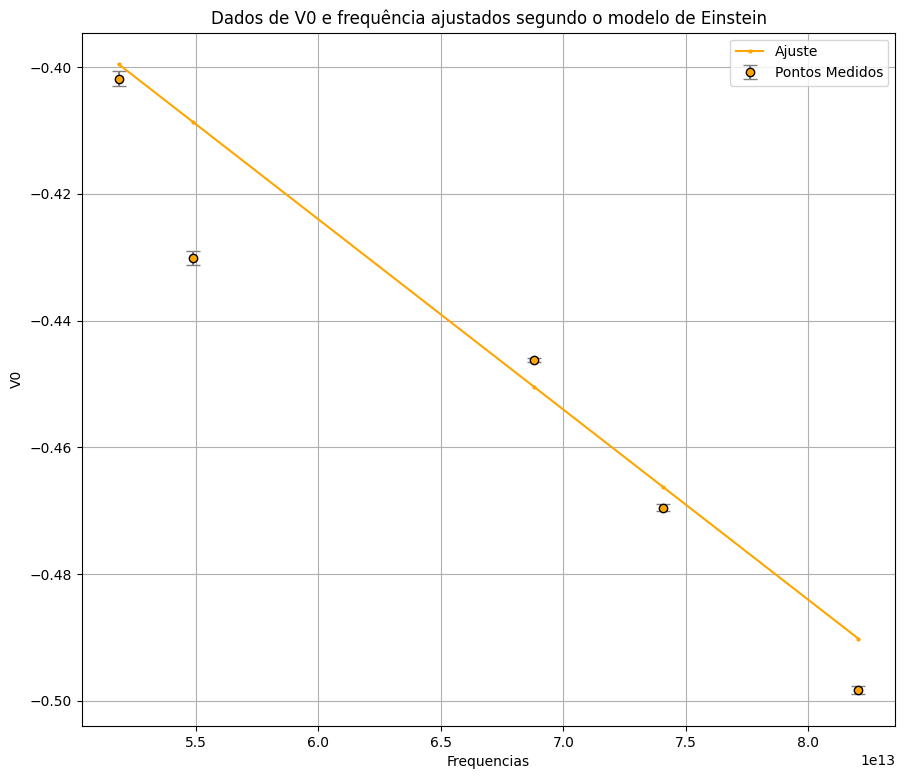

h =  4.811590147202898e-34 +ou- -5.6695364686037805e-36 SI Phi =  3.906513615124179e-20 +ou- -3.9831649561250593e-22 SI


In [211]:
hGenerator()